# Looking at different cuisines and violations

####THINGS TO TEST:
1. Q: what are the most popular cuisines?
    + find 3 different ways of visualizing this
    + maybe look at grade vs. time for 10 most popular?
2. what cuisines have most violations?
3. what cuisines have worst grades? 
4. maybe save file of 10 most popular cuisines? 


#### Explored data:
+  1, What kind of Actions were taken by the DOHMH
+  2, What is score?
+  3, what kind of Inspection types are there? 
+  What kind of violations get a critical flag? 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import ggplot

In [2]:
start = dt.datetime.now()
nydata = pd.read_csv('NYC_Resto.csv')

print "the loading took {} seconds ".format((dt.datetime.now()-start).seconds)

the loading took 3 seconds 


In [4]:
nydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449381 entries, 0 to 449380
Data columns (total 18 columns):
CAMIS                    449381 non-null int64
DBA                      448916 non-null object
BORO                     449381 non-null object
BUILDING                 449279 non-null object
STREET                   449381 non-null object
ZIPCODE                  449381 non-null int64
PHONE                    449335 non-null object
CUISINE DESCRIPTION      449381 non-null object
INSPECTION DATE          449381 non-null object
ACTION                   448223 non-null object
VIOLATION CODE           440876 non-null object
VIOLATION DESCRIPTION    440645 non-null object
CRITICAL FLAG            449381 non-null object
SCORE                    419950 non-null float64
GRADE                    211726 non-null object
GRADE DATE               210067 non-null object
RECORD DATE              449381 non-null object
INSPECTION TYPE          448223 non-null object
dtypes: float64(1), int64(

In [3]:
# remove a few columns that are unnecessary
nydata = nydata.drop(['CAMIS','PHONE','ZIPCODE','STREET', 'BUILDING','RECORD DATE'], axis=1)

## 1. What kind of Actions were taken by the DOHMH
+ there are 5 different kinds of actions that were taken by DOH
1. 1). Violations were cited in the following area(s).
2. 2). No violations were recorded at the time of this inspection.
3. 3). Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.
4. 4). 'Establishment re-closed by DOHMH'
5. 5). 'Establishment re-opened by DOHMH'

In [4]:
nydata['ACTION'].unique()

array(['Violations were cited in the following area(s).',
       'No violations were recorded at the time of this inspection.',
       'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.',
       nan, 'Establishment re-closed by DOHMH',
       'Establishment re-opened by DOHMH'], dtype=object)

In [5]:
grouped_action = nydata.groupby(nydata['ACTION'])
action_count = grouped_action[['ACTION']].count()

In [6]:
action_count

,ACTION
ACTION,
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.,10298
Establishment re-closed by DOHMH,1155
Establishment re-opened by DOHMH,2998
No violations were recorded at the time of this inspection.,7446
Violations were cited in the following area(s).,426326


In [7]:
action_count['TEXT']=action_count.index
action_count.index

Index([u'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.',
       u'Establishment re-closed by DOHMH',
       u'Establishment re-opened by DOHMH',
       u'No violations were recorded at the time of this inspection.',
       u'Violations were cited in the following area(s).'],
      dtype='object', name=u'ACTION')

In [8]:
action_count.rename(index={"Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.": 1})
action_count = action_count.rename(index={"Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.":1, 
                            "Establishment re-closed by DOHMH": 2,
                          "Establishment re-opened by DOHMH": 3,
                          "No violations were recorded at the time of this inspection.":4,
                          "Violations were cited in the following area(s).": 5})


In [9]:
action_t = action_count.T

In [10]:
action_t = action_t.drop('TEXT', axis=0)

In [95]:
action_t

ACTION,1,2,3,4,5
ACTION,10298,1155,2998,7446,426326


In [11]:
column = np.array(action_count['TEXT'])
column[0]

'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.'

+ I think I might need column-wise data rahter than row-wise data in order to get different colors for each Action 

In [12]:
action_count['ACTION']

ACTION
1     10298
2      1155
3      2998
4      7446
5    426326
Name: ACTION, dtype: int64

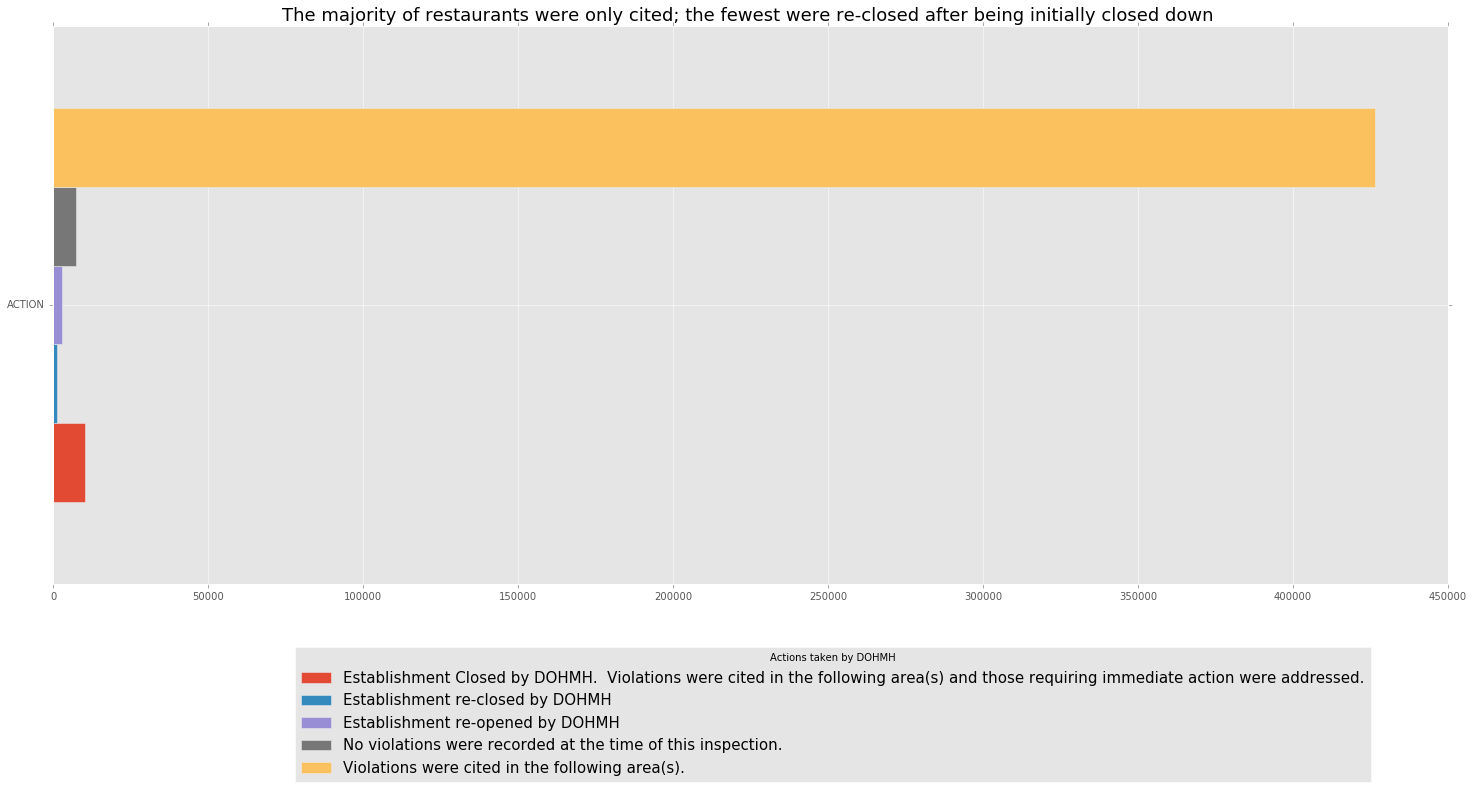

In [17]:
matplotlib.style.use('ggplot')

fig = plt.figure(figsize = (25,10))
ax1 = fig.add_subplot(111)

ind = np.arange(5) # 5 bars for the 5 counts
width = 0.35

#ax1.barh(ind, action_count['ACTION'], width)

action_t.plot.barh( ax=ax1, width = 1.2)

ax1.legend(column, fontsize=15, title= "Actions taken by DOHMH", bbox_to_anchor=(0.95, -0.1))
plt.title("The majority of restaurants were only cited; the fewest were re-closed after being initially closed down "
         , size=18)

# SAVE FIGURE
#fig.savefig('action_DOH.png',bbox_inches = 'tight') # the last arg. prevents legend from being cut off

In [139]:
total_sum = action_count['ACTION'].sum()
total_sum

448223

## What kind of violations get a critical flag? 
+ the possible flags are:
    'Not Critical', 'Critical', 'Not Applicable'

In [19]:
nydata['CRITICAL FLAG'].unique()

array(['Not Critical', 'Critical', 'Not Applicable'], dtype=object)

## 2. What is score?
+ looking at some unique scores, it seems to range from -2 to 117
+ what kind of restaurants/violations get a negative score?
+ 3 middle Eastern restaurants got a score of -2 yikes!
+ and 172 restaurants got a score of -1 (of a variety of cuisines)

In [18]:
nydata['CRITICAL FLAG'].unique()

array(['Not Critical', 'Critical', 'Not Applicable'], dtype=object)

In [14]:
nydata['SCORE'].unique()

array([   6.,   30.,   10.,   13.,   45.,   22.,    8.,   24.,   11.,
         28.,    7.,   29.,   23.,   12.,   nan,    5.,   15.,   59.,
         25.,    9.,   61.,   33.,   21.,   81.,    2.,   32.,   39.,
         18.,   34.,   93.,   16.,   54.,   55.,   17.,   38.,    4.,
         19.,   37.,   26.,   20.,   27.,   40.,    3.,   36.,   35.,
         57.,   42.,   65.,   14.,   56.,   67.,   51.,   48.,   46.,
         31.,   64.,    0.,   58.,   53.,   70.,   96.,   47.,   60.,
         49.,   52.,   50.,   83.,   44.,   41.,   63.,   80.,   62.,
        105.,   43.,   73.,   85.,  102.,   90.,   88.,   76.,   82.,
         71.,   72.,   -1.,   98.,   66.,   74.,   92.,   68.,   77.,
         91.,   84.,   94.,  115.,   87.,   75.,  112.,   78.,  114.,
         97.,  104.,   69.,  122.,   86.,  111.,   89.,   79.,  106.,
        108.,   95.,  121.,  100.,   99.,  103.,  156.,  109.,  110.,
        131.,  107.,   -2.,  117.])

In [25]:
bad_score = nydata[nydata['SCORE'] == -2]
bad_score['CUISINE DESCRIPTION']

133487    Middle Eastern
167803    Middle Eastern
177890    Middle Eastern
Name: CUISINE DESCRIPTION, dtype: object

In [27]:
bad_score = nydata[nydata['SCORE'] == -1]
bad_score['CUISINE DESCRIPTION'].count()

172

## 3.  what kind of Inspection types are there? 
+ there are 34 different types of inspection

In [10]:
list_type = nydata['INSPECTION TYPE'].unique()
list_type

array(['Pre-permit (Non-operational) / Initial Inspection',
       'Pre-permit (Operational) / Initial Inspection',
       'Cycle Inspection / Initial Inspection',
       'Cycle Inspection / Re-inspection',
       'Administrative Miscellaneous / Re-inspection',
       'Inter-Agency Task Force / Initial Inspection',
       'Smoke-Free Air Act / Initial Inspection',
       'Calorie Posting / Compliance Inspection',
       'Administrative Miscellaneous / Initial Inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Cycle Inspection / Compliance Inspection',
       'Smoke-Free Air Act / Re-inspection', nan,
       'Pre-permit (Non-operational) / Re-inspection',
       'Trans Fat / Initial Inspection',
       'Administrative Miscellaneous / Compliance Inspection',
       'Trans Fat / Second Compliance Inspection',
       'Cycle Inspection / Reopening Inspection',
       'Trans Fat / Compliance Inspection',
       'Pre-permit (Operational) / Reopening Inspection',
       'T

In [11]:
list_type.size


34